In [ ]:
import pandas as pd
import numpy as np 


In [67]:
df  = pd.read_csv('Skills Assessment.csv')
df.head()

,Primary Policy Name,Service,Miles,Unnamed: 3,Payment Amount,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,MDC Electronic(Gateway 5010),Basic Life Support NonEmergency,15.0,NaN,$240.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AETNA,Basic Life Support NonEmergency,3.0,NaN,$284.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AETNA,Basic Life Support NonEmergency,2.0,NaN,$275.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GEISINGER HEALTH PLAN,Basic Life Support NonEmergency,21.0,NaN,$183.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MDC Electronic(Gateway 5010),Basic Life Support NonEmergency,6.0,NaN,$248.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df.columns

Index(['Primary Policy Name', 'Service', 'Miles', 'Unnamed: 3',
       'Payment Amount', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17'],
      dtype='object')

In [105]:
print("Min value:", df['Payment Amount'].min())
print("Max value:", df['Payment Amount'].max())


Min value: 71.52
Max value: 515.0


In [69]:
df = df[['Primary Policy Name', 'Service', 'Miles','Payment Amount']]


In [70]:
df.head()

,Primary Policy Name,Service,Miles,Payment Amount
0,MDC Electronic(Gateway 5010),Basic Life Support NonEmergency,15.0,$240.14
1,AETNA,Basic Life Support NonEmergency,3.0,$284.69
2,AETNA,Basic Life Support NonEmergency,2.0,$275.93
3,GEISINGER HEALTH PLAN,Basic Life Support NonEmergency,21.0,$183.99
4,MDC Electronic(Gateway 5010),Basic Life Support NonEmergency,6.0,$248.78


### check null values

In [71]:
df.isnull().any().any()

np.False_

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1777 entries, 0 to 1776
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Primary Policy Name  1777 non-null   object 
 1   Service              1777 non-null   object 
 2   Miles                1777 non-null   float64
 3   Payment Amount       1777 non-null   object 
dtypes: float64(1), object(3)
memory usage: 55.7+ KB


### preprocessing data

1.remove $ marks from payment amount column and convert type object into float

In [73]:
df['Payment Amount'] = df['Payment Amount'].replace('[\$,]', '', regex=True).astype(float)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1777 entries, 0 to 1776
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Primary Policy Name  1777 non-null   object 
 1   Service              1777 non-null   object 
 2   Miles                1777 non-null   float64
 3   Payment Amount       1777 non-null   float64
dtypes: float64(2), object(2)
memory usage: 55.7+ KB


In [75]:
df['Primary Policy Name'].value_counts()

Primary Policy Name
MDC Electronic(Gateway 5010)       895
AETNA MEDICARE ADVANTAGE           182
AETNA                              118
HIGHMARK MEDICARE ADVANTAGE         80
UNITED HEALTHCARE                   69
HUMANA                              64
HIGHMARK WHOLECARE MEDICAID         62
UPMC HEALTH PLAN                    54
HIGHMARK BCBS PA                    54
CAPITAL BLUE CROSS PA               41
GEISINGER HEALTH PLAN               37
BLUE CROSS FEDERAL                  22
AMERIHEALTH CARITAS PA              17
VA FEE BASIS                        15
HIGHMARK BLUESHEILD                 13
COMMUNITY BLUE                       9
Patient                              7
PA HEALTH AND WELLNESS               6
CIGNA                                6
WELLCARE HEALTH PLANS                5
KEYSTONE HEALTH PLAN CENTRAL         4
AMERIHEALTH CARITAS CHC              3
GATEWAY HIGHMARK WHOLE MEDICAID      3
HEALTH PARTNERS OF PA                2
AARP                                 2
GATEW

In [76]:
df['Service'].value_counts()

Service
Basic Life Support NonEmergency    1773
UPMC Base Rate BLS                    4
Name: count, dtype: int64

#### Convert Text data into numerical values using label Encoder

In [77]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Primary Policy Name'] = label_encoder.fit_transform(df['Primary Policy Name'])
df['Service'] = label_encoder.fit_transform(df['Service'])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1777 entries, 0 to 1776
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Primary Policy Name  1777 non-null   int64  
 1   Service              1777 non-null   int64  
 2   Miles                1777 non-null   float64
 3   Payment Amount       1777 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 55.7 KB


In [79]:
df['Primary Policy Name'].value_counts()

Primary Policy Name
21    895
2     182
1     118
17     80
26     69
19     64
18     62
27     54
15     54
8      41
13     37
6      22
5      17
28     15
16     13
10      9
24      7
23      6
9       6
29      5
20      4
4       3
11      3
14      2
0       2
12      2
3       2
22      1
25      1
7       1
Name: count, dtype: int64

In [80]:
df['Service'].value_counts()

Service
0    1773
1       4
Name: count, dtype: int64

### plot correlation metrix

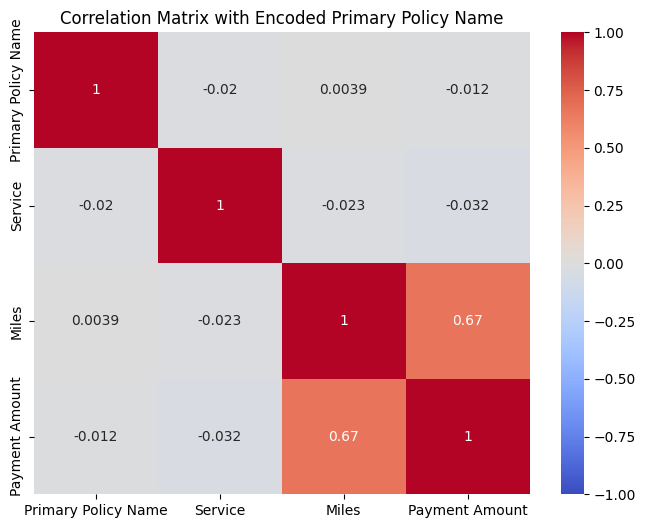

In [83]:
import seaborn as sns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_cols]
corr_matrix = numeric_df.corr(method='pearson')  
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix with Encoded Primary Policy Name')
plt.show()

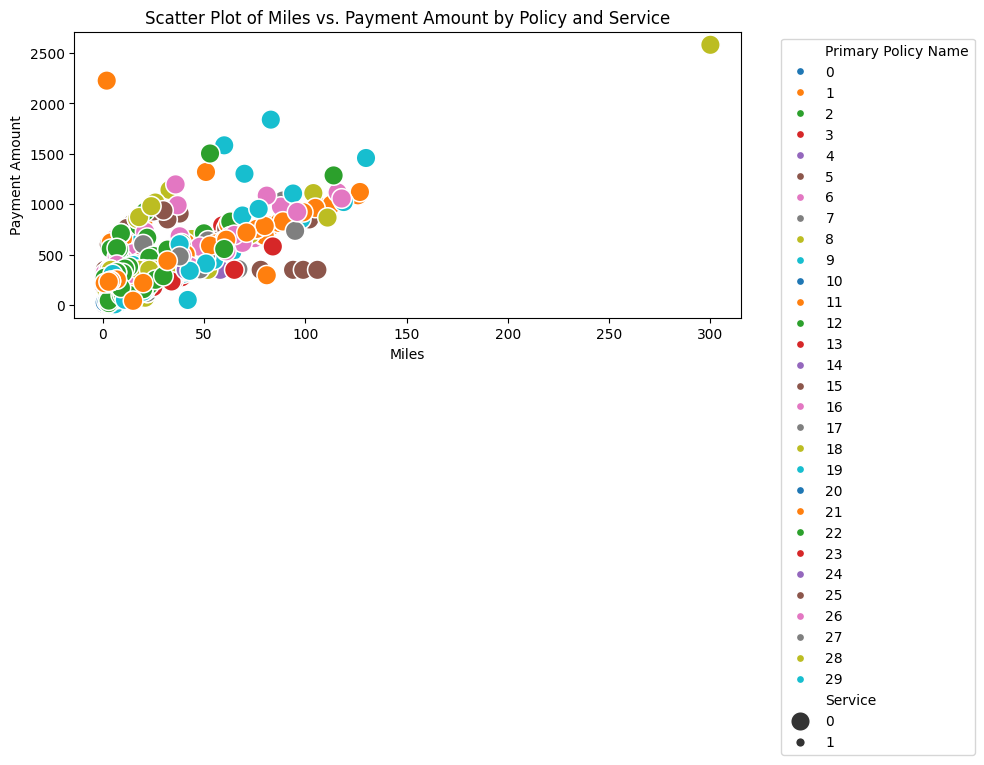

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Miles', y='Payment Amount', hue='Primary Policy Name', 
                palette='tab10', size='Service', sizes=(50, 200))
plt.title('Scatter Plot of Miles vs. Payment Amount by Policy and Service')
plt.xlabel('Miles')
plt.ylabel('Payment Amount')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

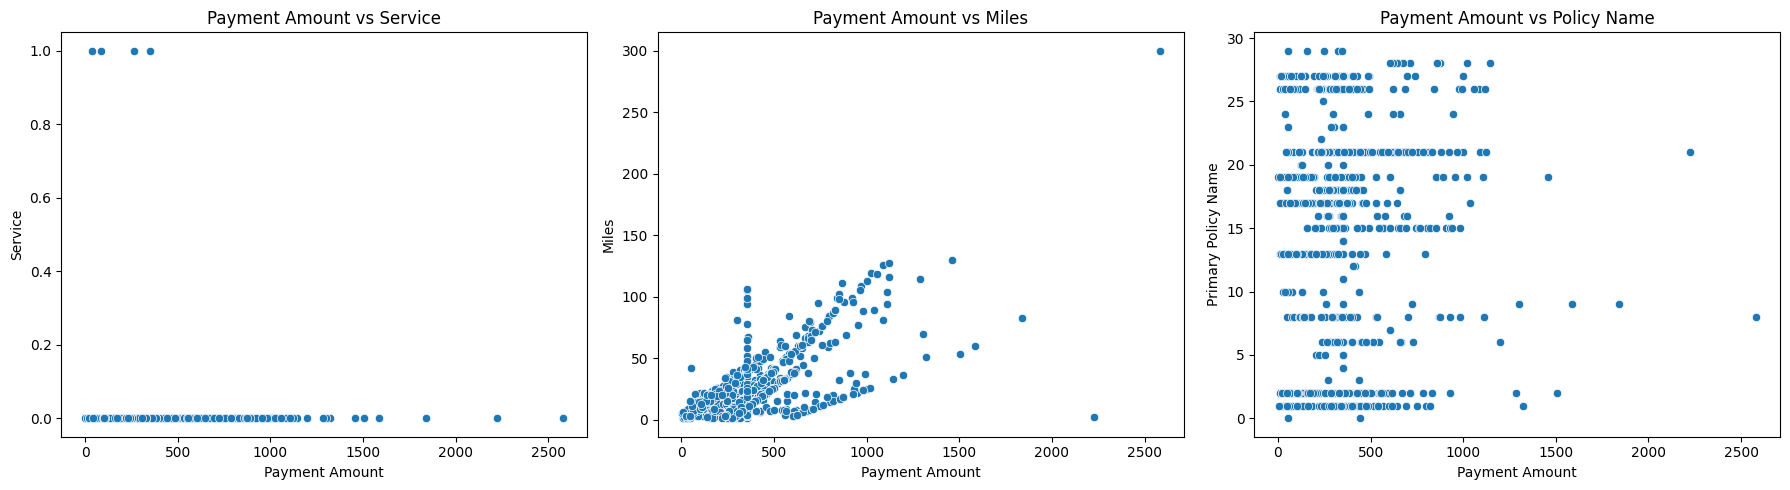

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(1, 3, figsize=(18, 5)) 

sns.scatterplot(ax=axes[0], x='Payment Amount', y='Service', data=df)
axes[0].set_title("Payment Amount vs Service")


sns.scatterplot(ax=axes[1], x='Payment Amount', y='Miles', data=df)
axes[1].set_title("Payment Amount vs Miles")


sns.scatterplot(ax=axes[2], x='Payment Amount', y='Primary Policy Name', data=df)
axes[2].set_title("Payment Amount vs Policy Name")

plt.tight_layout()  
plt.show()


### Remove outliers from payment Amount and Miles

In [90]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

df = remove_outliers_iqr(df, 'Payment Amount')
df = remove_outliers_iqr(df, 'Miles')

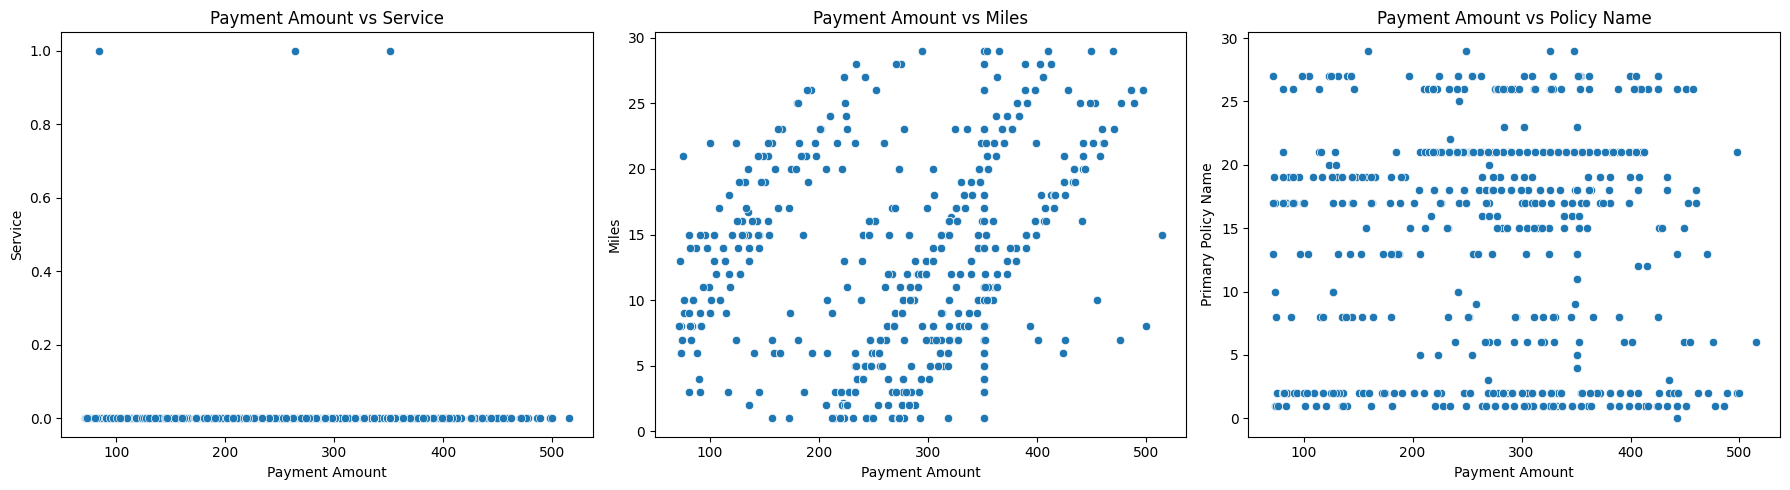

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) 

sns.scatterplot(ax=axes[0], x='Payment Amount', y='Service', data=df)
axes[0].set_title("Payment Amount vs Service")
sns.scatterplot(ax=axes[1], x='Payment Amount', y='Miles', data=df)
axes[1].set_title("Payment Amount vs Miles")
sns.scatterplot(ax=axes[2], x='Payment Amount', y='Primary Policy Name', data=df)
axes[2].set_title("Payment Amount vs Policy Name")
plt.tight_layout()  
plt.show()

# Try Linear Regression Model

In [93]:
features = ['Miles', 'Primary Policy Name', 'Service']
target = 'Payment Amount'
X = df[features]
y = df[target]

In [94]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Training Metrics:")
print(f"MSE: {train_mse:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"R²: {train_r2:.2f}")

print("\nTesting Metrics:")
print(f"MSE: {test_mse:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"R²: {test_r2:.2f}")

Training Metrics:
MSE: 5255.70
RMSE: 72.50
R²: 0.10

Testing Metrics:
MSE: 4951.48
RMSE: 70.37
R²: 0.18


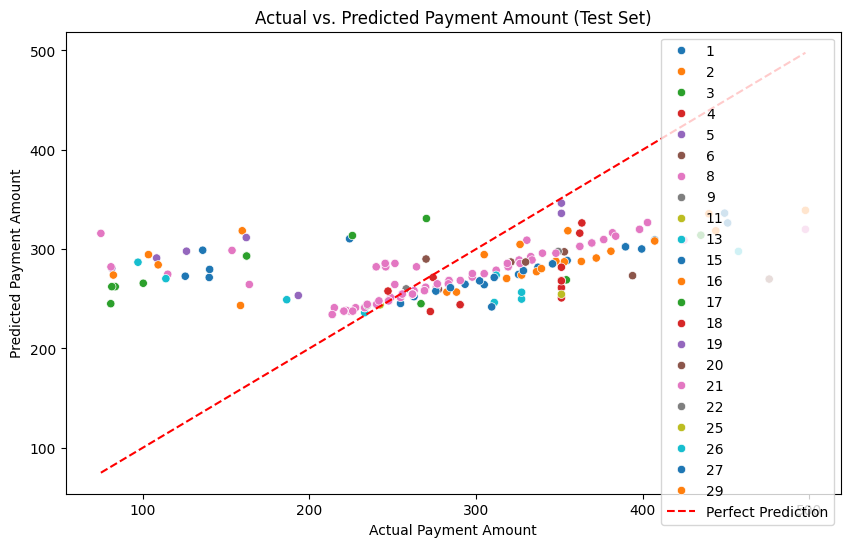

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


test_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test,
    'Primary Policy Name Encoded': X_test['Primary Policy Name']
})


plt.figure(figsize=(10, 6))
sns.scatterplot(data=test_results, x='Actual', y='Predicted', hue='Primary Policy Name Encoded', palette='tab10')
plt.plot([test_results['Actual'].min(), test_results['Actual'].max()], 
         [test_results['Actual'].min(), test_results['Actual'].max()], 
         'r--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Payment Amount (Test Set)')
plt.xlabel('Actual Payment Amount')
plt.ylabel('Predicted Payment Amount')
plt.legend()
plt.show()

## Try Classification Model

In [100]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate metrics
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Adjusted R²
n_train, p = X_train.shape
n_test = X_test.shape[0]
train_adj_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p - 1)
test_adj_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p - 1)

# Print results
print("Training Metrics (XGBoost):")
print(f"MSE: {train_mse:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"MAE: {train_mae:.2f}")
print(f"R²: {train_r2:.2f}")
print(f"Adjusted R²: {train_adj_r2:.2f}")

print("\nTesting Metrics (XGBoost):")
print(f"MSE: {test_mse:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"MAE: {test_mae:.2f}")
print(f"R²: {test_r2:.2f}")
print(f"Adjusted R²: {test_adj_r2:.2f}")

Training Metrics (XGBoost):
MSE: 2420.05
RMSE: 49.19
MAE: 28.33
R²: 0.58
Adjusted R²: 0.58

Testing Metrics (XGBoost):
MSE: 3984.57
RMSE: 63.12
MAE: 36.45
R²: 0.34
Adjusted R²: 0.33


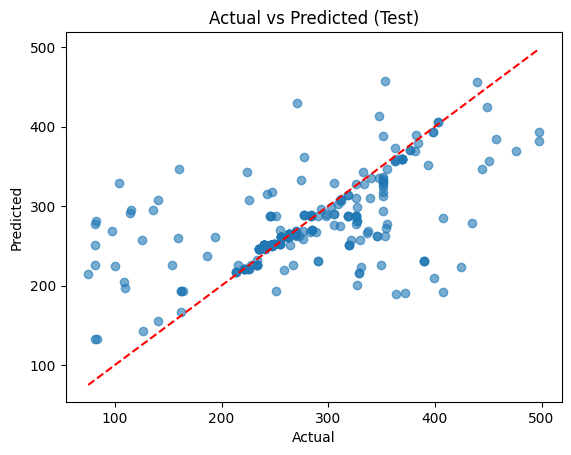

In [102]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Test)")
plt.show()


## Hyperparameter Tuning

In [103]:
from sklearn.model_selection import  GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Initialize XGBoost model
xgb = XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='r2',  # Optimize for R²
    n_jobs=-1,  # Use all CPU cores
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("\nBest Parameters:", grid_search.best_params_)
print("Best R² Score (Cross-Validation):", grid_search.best_score_)

# Train model with best parameters
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


c:\Users\laksh\Desktop\projects\ML Projects\Prediction of Payment\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
1 fits failed out of a total of 3645.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\laksh\Desktop\projects\ML Projects\Prediction of Payment\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\laksh\Desktop\projects\ML Projects\Prediction of Payment\.venv\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\laksh\Desk


Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.8}
Best R² Score (Cross-Validation): 0.24323727700542408


In [104]:
best_params = {
    'colsample_bytree': 0.7,
    'learning_rate': 0.1,
    'max_depth': 6,
    'min_child_weight': 3,
    'n_estimators': 50,
    'subsample': 0.8,
    'random_state': 42
}
model = XGBRegressor(**best_params)
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Adjusted R²
n_train, p = X_train.shape
n_test = X_test.shape[0]
train_adj_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p - 1)
test_adj_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p - 1)

# Print results
print("\nTraining Metrics (Tuned XGBoost):")
print(f"MSE: {train_mse:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"MAE: {train_mae:.2f}")
print(f"R²: {train_r2:.2f}")
print(f"Adjusted R²: {train_adj_r2:.2f}")

print("\nTesting Metrics (Tuned XGBoost):")
print(f"MSE: {test_mse:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"MAE: {test_mae:.2f}")
print(f"R²: {test_r2:.2f}")
print(f"Adjusted R²: {test_adj_r2:.2f}")


Training Metrics (Tuned XGBoost):
MSE: 3179.85
RMSE: 56.39
MAE: 35.74
R²: 0.45
Adjusted R²: 0.45

Testing Metrics (Tuned XGBoost):
MSE: 3482.89
RMSE: 59.02
MAE: 36.51
R²: 0.42
Adjusted R²: 0.42


### Log-transform

In [108]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Example: Assume df is your DataFrame with features and 'Payment Amount' target
# df = pd.read_csv('your_data.csv')  # Replace with your data source

# Features and target
X = df.drop(columns=['Payment Amount'])
y = df['Payment Amount']

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Log-transform the target (y_train)
y_train_log = np.log1p(y_train)  # log(1 + y) to handle zero or small values safely

model = XGBRegressor(
    learning_rate=0.05,
    n_estimators=200,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.5,   # L1 regularization
    reg_lambda=1.0,  # L2 regularization
    random_state=42
)


# Train model on log-transformed target
model.fit(X_train, y_train_log)

# Predict on train and test (log scale)
y_pred_train_log = model.predict(X_train)
y_pred_test_log = model.predict(X_test)

# Invert predictions back to original scale
y_pred_train = np.expm1(y_pred_train_log)  # exp(y) - 1
y_pred_test = np.expm1(y_pred_test_log)

# Calculate metrics on original scale
def print_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset_name} Metrics:")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R²: {r2:.2f}\n")

print_metrics(y_train, y_pred_train, "Training")
print_metrics(y_test, y_pred_test, "Testing")



Training Metrics:
  MSE: 4047.24
  RMSE: 63.62
  MAE: 43.10
  R²: 0.30

Testing Metrics:
  MSE: 3931.43
  RMSE: 62.70
  MAE: 42.25
  R²: 0.35

